# NOAA HRES Optimum Interpolated V2 SST Data (Daily Update)

In [14]:
%matplotlib inline

In [15]:
#using xarray for data read
import xarray as xa

#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean


In [16]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

In [17]:
import datetime
print("Last run {0}".format(datetime.datetime.now()))

Last run 2018-05-16 06:51:25.921306


## Last 7 Days

In [18]:
year = '2018'

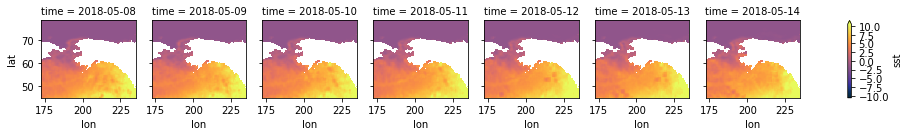

In [19]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.'+year+'.v2.nc'

cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-7,None), lat=slice(-180,-45), lon=slice(-750,-500)) #last seven days
    facet = pd['sst'].plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2),cmap=cmap)

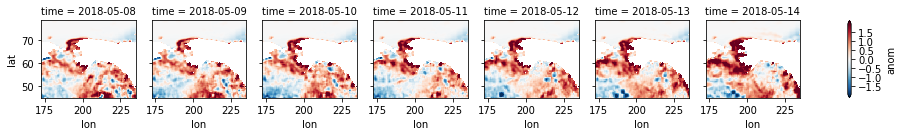

In [20]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.anom.'+year+'.v2.nc'

cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-7,None), lat=slice(-180,-45), lon=slice(-750,-500)) #last seven days
    facet = pd['anom'].plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2))

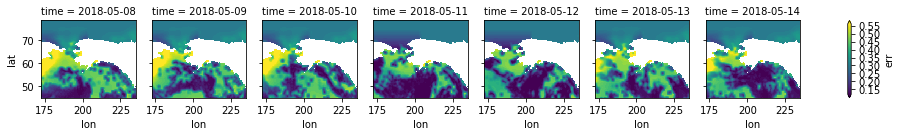

In [21]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.err.'+year+'.v2.nc'

cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-7,None), lat=slice(-180,-45), lon=slice(-750,-500)) #last seven days
    facet = pd['err'].plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2))

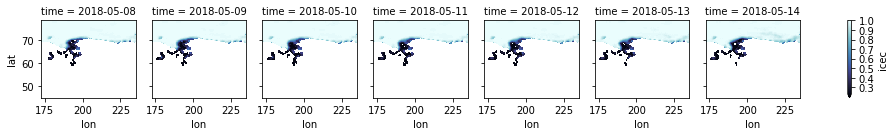

In [22]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/icec.day.mean.'+year+'.v2.nc'

cmap = cmocean.cm.ice
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-7,None), lat=slice(-180,-45), lon=slice(-750,-500)) #last seven days
    facet = pd['icec'].plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2),cmap=cmap)

## Last Day

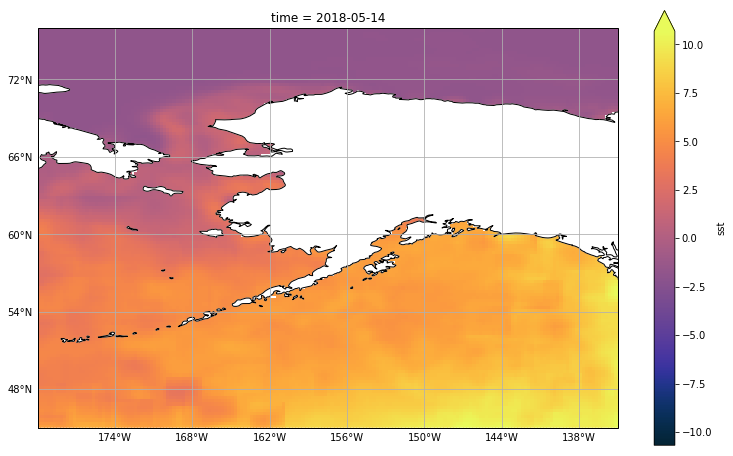

In [23]:
extent = [-180, -135, 45, 75]
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.'+year+'.v2.nc'
cmap = cmocean.cm.thermal

with xa.open_dataset(threddspath) as xadf:
    fig,ax = make_map(projection=ccrs.PlateCarree(-160))
    xadf['sst'].isel(time=-1,lat=slice(-180,-45),lon=slice(-750,-500)).plot(x='lon', y='lat',robust=True,ax=ax, transform=ccrs.PlateCarree(),cmap=cmap)
    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)


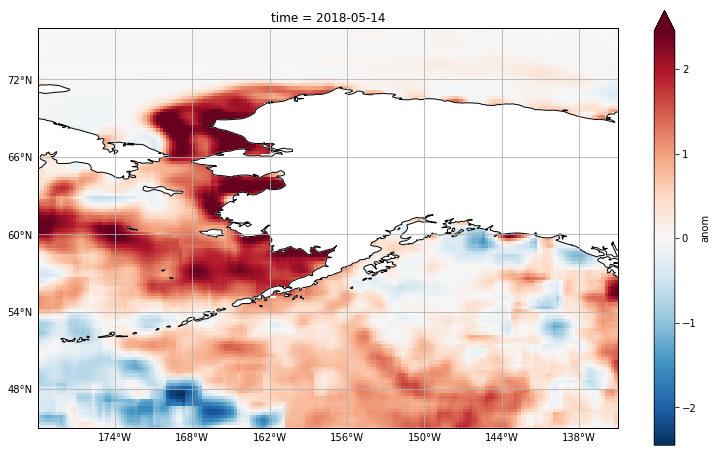

In [24]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.anom.'+year+'.v2.nc'

with xa.open_dataset(threddspath) as xadf:
    fig,ax = make_map(projection=ccrs.PlateCarree(-160))
    xadf['anom'].isel(time=-1,lat=slice(-180,-45),lon=slice(-750,-500)).plot(x='lon', y='lat',robust=True,ax=ax, transform=ccrs.PlateCarree())
    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)

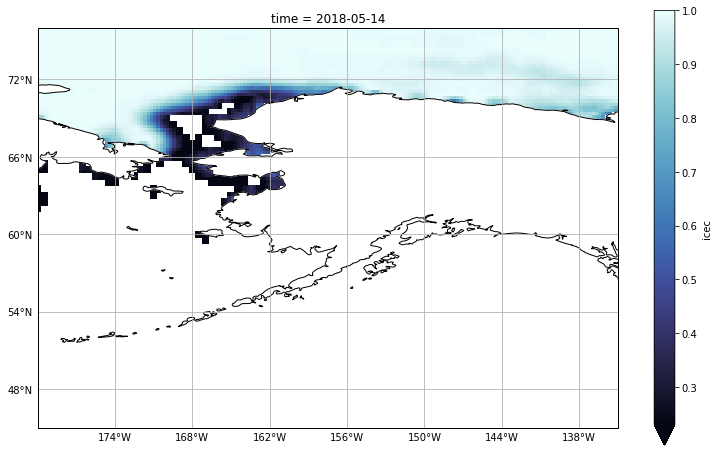

In [25]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/icec.day.mean.'+year+'.v2.nc'

cmap = cmocean.cm.ice
with xa.open_dataset(threddspath) as xadf:
    fig,ax = make_map(projection=ccrs.PlateCarree(-160))
    xadf['icec'].isel(time=-1,lat=slice(-180,-45),lon=slice(-750,-500)).plot(x='lon', y='lat',
                                                                             robust=True,ax=ax,
                                                                             transform=ccrs.PlateCarree(),
                                                                             cmap=cmap)
    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)

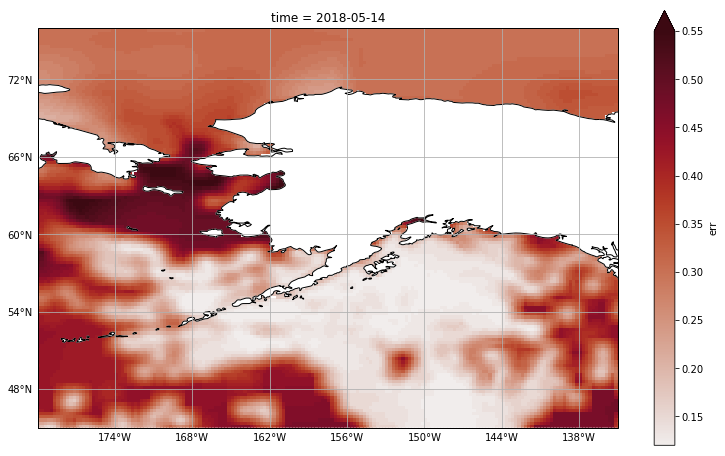

In [26]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.err.'+year+'.v2.nc'

cmap = cmocean.cm.amp
with xa.open_dataset(threddspath) as xadf:
    fig,ax = make_map(projection=ccrs.PlateCarree(-160))
    xadf['err'].isel(time=-1,lat=slice(-180,-45),lon=slice(-750,-500)).plot(x='lon', y='lat',
                                                                             robust=True,ax=ax,
                                                                             transform=ccrs.PlateCarree(),
                                                                             cmap=cmap)
    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)